In [73]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('Airbnb_Open_Data.csv');
df.head(5)

C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1837190981.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv');


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [75]:
df.shape

(102599, 26)

In [76]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [77]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [78]:
#replace the datatype to string, to be replace the character and symbols
df = df.astype('string')
df.dtypes

id                                string
NAME                              string
host id                           string
host_identity_verified            string
host name                         string
neighbourhood group               string
neighbourhood                     string
lat                               string
long                              string
country                           string
country code                      string
instant_bookable                  string
cancellation_policy               string
room type                         string
Construction year                 string
price                             string
service fee                       string
minimum nights                    string
number of reviews                 string
last review                       string
reviews per month                 string
review rate number                string
calculated host listings count    string
availability 365                  string
house_rules     

In [79]:
#replacing the symbols and characters
df['price'] = df['price'].str.replace('$', '')
df['service fee'] = df['service fee'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['service fee'] = df['service fee'].str.replace(',', '')

C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\710635364.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')
C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\710635364.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service fee'] = df['service fee'].str.replace('$', '')


In [80]:
#setting the price,service fee, c.h.l.c. and availability to float
df[['price', 'service fee', 'review rate number','minimum nights','number of reviews'
   ,'reviews per month','calculated host listings count','availability 365']] = df[['price', 'service fee', 
    'review rate number','minimum nights','number of reviews' ,'reviews per month',
    'calculated host listings count','availability 365']].apply(pd.to_numeric)

df.dtypes

id                                 string
NAME                               string
host id                            string
host_identity_verified             string
host name                          string
neighbourhood group                string
neighbourhood                      string
lat                                string
long                               string
country                            string
country code                       string
instant_bookable                   string
cancellation_policy                string
room type                          string
Construction year                  string
price                             float64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
last review                        string
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

# Replacing the Missing Values

In [85]:
#replacing missing values with mean
price_mean=df['price'].mean();
df['price'].fillna(price_mean,inplace=True);

servicefee_mean=df['service fee'].mean();
df['service fee'].fillna(servicefee_mean,inplace=True);

revRateNum_mean=df['review rate number'].mean();
df['review rate number'].fillna(revRateNum_mean,inplace=True);

In [86]:
#replacing NA to missing values 
df['NAME'].fillna('NA',inplace=True);
df['host_identity_verified'].fillna('NA',inplace=True);
df['host name'].fillna('NA',inplace=True);
df['neighbourhood group'].fillna('NA',inplace=True);
df['neighbourhood'].fillna('NA',inplace=True);
df['country'].fillna('NA',inplace=True);
df['country code'].fillna('NA',inplace=True);
df['cancellation_policy'].fillna('NA',inplace=True);
df['house_rules'].fillna('NA',inplace=True);
df['instant_bookable'].fillna('NA',inplace=True);
df['lat'].fillna('NA',inplace=True);
df['long'].fillna('NA',inplace=True);
df['Construction year'].fillna('NA',inplace=True);
df['license'].fillna('NA',inplace=True);
df['last review'].fillna('NA',inplace=True);

In [87]:
#replacing missing values with median
minimum_nights_median=df['minimum nights'].median();
df['minimum nights'].fillna(minimum_nights_median,inplace=True);

numRev_median=df['number of reviews'].median();
df['number of reviews'].fillna(numRev_median,inplace=True);

reviewMonth_median=df['reviews per month'].median();
df['reviews per month'].fillna(reviewMonth_median,inplace=True);

chlc_median=df['calculated host listings count'].median();
df['calculated host listings count'].fillna(chlc_median,inplace=True);

availability_median=df['availability 365'].median();
df['availability 365'].fillna(availability_median,inplace=True);

In [88]:
df.isna().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64

# Checking the Outliers using Boxplot

Column that contains mean and median Values

C:\Users\Bryan Russel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


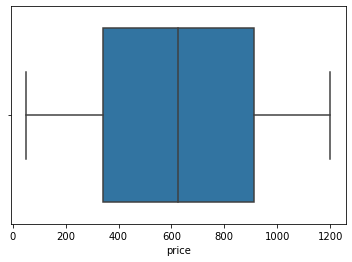

In [106]:
sns.boxplot(df['price']);

C:\Users\Bryan Russel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


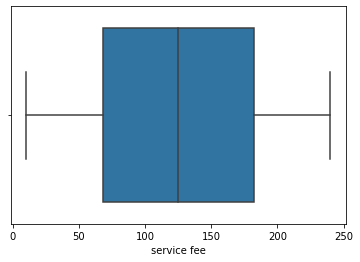

In [108]:
sns.boxplot(df['service fee']);

<AxesSubplot:xlabel='minimum nights'>

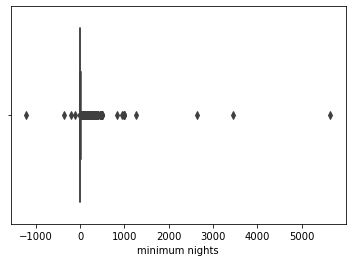

In [109]:
sns.boxplot(df['minimum nights'])

C:\Users\Bryan Russel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number of reviews'>

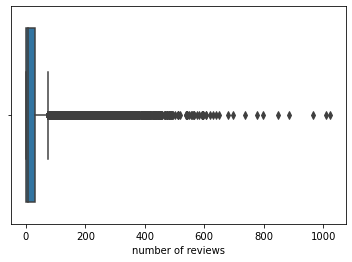

In [110]:
sns.boxplot(df['number of reviews'])

C:\Users\Bryan Russel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reviews per month'>

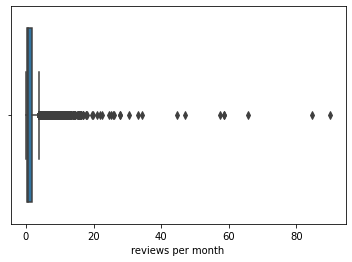

In [111]:
sns.boxplot(df['reviews per month'])

<AxesSubplot:xlabel='review rate number'>

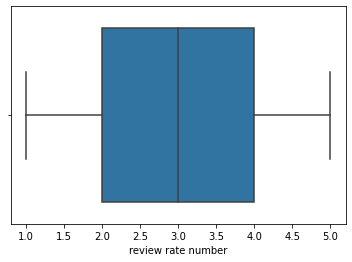

In [112]:
sns.boxplot(x=df['review rate number'])

<AxesSubplot:xlabel='calculated host listings count'>

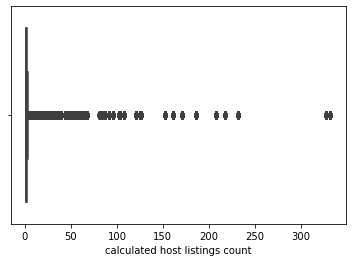

In [113]:
sns.boxplot(x=df['calculated host listings count'])

<AxesSubplot:xlabel='availability 365'>

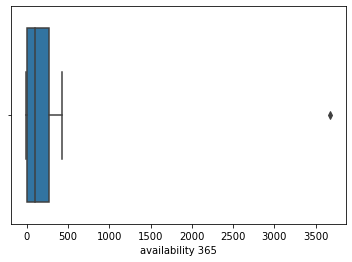

In [114]:
sns.boxplot(x=df['availability 365'])

# Eliminating Extreme Values and using Boxplot for Visualization

In [125]:
#elimininating Extreme Values
def remove_Outliers(col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df[col][df[col] < min_] = min_;
    df[col][df[col] > max_] = max_;

C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < min_] = min_;
C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > max_] = max_;


<AxesSubplot:xlabel='minimum nights'>

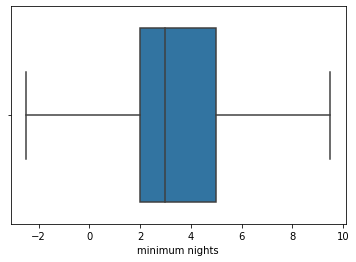

In [126]:
remove_Outliers('minimum nights');
sns.boxplot(x=df['minimum nights'])

C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < min_] = min_;
C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > max_] = max_;


<AxesSubplot:xlabel='number of reviews'>

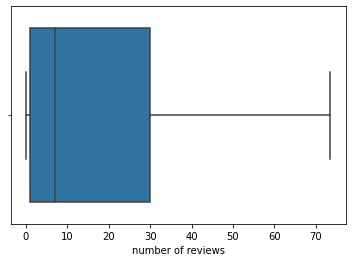

In [127]:
remove_Outliers('number of reviews');
sns.boxplot(x=df['number of reviews'])

C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < min_] = min_;
C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > max_] = max_;


<AxesSubplot:xlabel='reviews per month'>

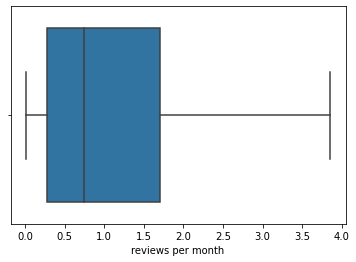

In [129]:
remove_Outliers('reviews per month');
sns.boxplot(x=df['reviews per month'])

C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < min_] = min_;
C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > max_] = max_;


<AxesSubplot:xlabel='calculated host listings count'>

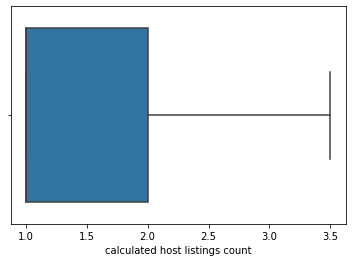

In [130]:
remove_Outliers('calculated host listings count');
sns.boxplot(x=df['calculated host listings count'])

C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < min_] = min_;
C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_8452\1918523454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > max_] = max_;


<AxesSubplot:xlabel='availability 365'>

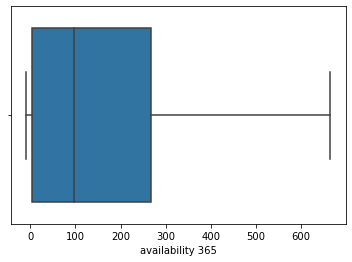

In [131]:
remove_Outliers('availability 365');
sns.boxplot(x=df['availability 365'])